
| <h1> Hands-on Activity 4.1 </h1> | <h1> Advanced Data Analytics and Machine Learning </h1> |
|--- | --- |
Name: Feliciano, Kurt <br>
Course and Section: CPE019 - CPE32S3 <br>
Date Submitted: 02/21/24<br>
Instructor: Engr. Roman Richard
Date Performed: 02/21/24

<h3><b>Plotting, Regression</h3>

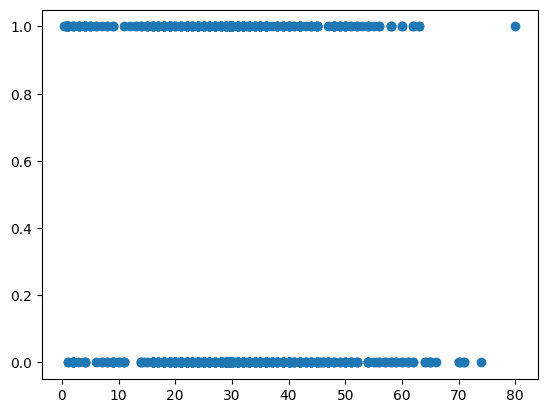

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
training = pd.read_csv("/content/titanic_train.csv")

training["Age"].fillna(training["Age"].mean(), inplace = True)
plt.scatter(training["Age"], training["Survived"])

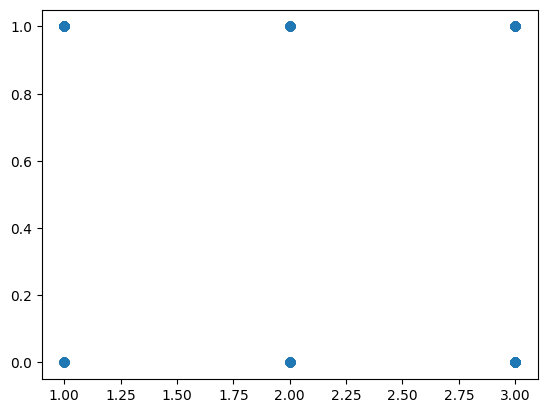

In [52]:
plt.scatter(training["Pclass"], training["Survived"])

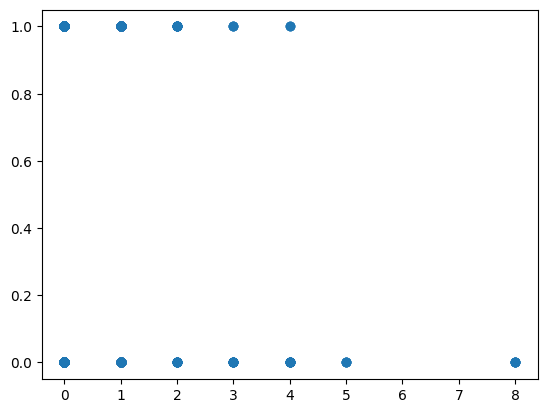

In [53]:
plt.scatter(training["SibSp"], training["Survived"])

In [56]:
## Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = training[['Age']]
y = training['Survived']

reg.fit(x, y)
reg.score(x, y)

0.004873228806595242

In [57]:
x1 = training [['Pclass']]

reg.fit(x1, y)
reg.score(x1, y)

0.11456941170524182

In [58]:
x2 = training[['SibSp']]

reg.fit(x2, y)
reg.score(x2, y)

0.001247678927532414

<h3> <b>Part 1 : Create a Decision Tree Classifier </h3>

<b>Step 1: Create the dataframe<br><br>
<i>a) Import pandas and the csv file</b></i><br><br>
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-
train.csv file. Use the pd.read_csv() method.

In [2]:
# code cell 1
import pandas as pd
training = pd.read_csv("/content/titanic_train.csv")

In [3]:
# code cell 2
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set ?
- Upon comparing, there were no missing values in the data set. However, there were some inconsistencies, where the Gender variable actually had the name Sex instead.

In [4]:
# code cell 3
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<B>Step 2: Prepare the Data for the Decision Tree Model.<br><br>
<i>a) Replace string data with numeric labels </b></i><br><br>
We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."<br><br>
In this code, a lambda expression is used with the apply() dataframe method. This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [5]:
# code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel ==
'male' else 1)

<b><i>b) Verify that the Gender variable has been changed.</b></i><br><br>
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [6]:
# code cell 5
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


<b><i>c) Address Missing Values in the Dataset</b></i><br><br>
The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.<br><br>
This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument

In [7]:
# code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

***d) Verify that the values have been replaced***

In [8]:
# code cell 7
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


What is the value that was used to replace the missing ages?

In [9]:
print(training["Age"].mean())

29.69911764705882


**Step 3: Train and Score the Decision Tree Model.**<br><br>
***a) Create an array object with the variable that will be the target for the model.***<br><br>
The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors and
victims. The model will learn which input variable values are most likely to belong to victims and survivors, and
then use that information to classify passengers from a unique test data set

In [10]:
# code cell 8
y_target = training["Survived"].values

***b) Create an array of the values that will be the input for the model.***<br><br>
Only some of the features of the data are useful for creating the classifier tree. We create a list of the columns
from the data that we want the classifier to use as the input variables and then create an array using the column
name from that variable. The variable X_input holds the values for all the features that the model will use to
learn how to make the classifications. After the model is trained, we will use this variable to assign these labels
to the test data set.


In [11]:
# code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
X_input = training[list(columns)].values

***c) Create the learned model.***<br><br>
Import the decision tree module from the sklearn machine learning library. Create the classifier object
clf_train. Then, use the fit() method of the classifier object, with the X_input and y_target variables as
parameters, to train the model.

In [12]:
#code cell 10
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_input, y_target)

***d) Evaluate the model***<br><br>
Use the score() method of the decision tree object to display the percentage accuracy of the assignments
made by the classifier. It takes the input and target variables as arguments.

In [13]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

This score value indicates that classifications made by the model should be correct approximately 82% of the
time. <br><br>
**Step 4: Visualize the Tree**<br><br>
***a) Create the intermediate file output***<br><br>
Import the sklearn.externals.six StringIO module which is used to output the characteristics of the
decision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifier
into a format that can be converted into a graphic.


In [14]:
# code cell 12
from six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

***b) Install Graphviz***<br><br>
To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that a
prompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz
command from the terminal command line to install this software.
<br><br>***c) Convert the intermediate file to a graphic***<br><br>
The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shell
command, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in the
directory that contains this notebook.

In [15]:
!pip install graphviz

In [16]:
# code cell 13
!dot -Tpng titanic.dot -o titanic.png

***d) Display the image***<br><br>
Now we will import the Image module from the IPython.display library. This will allow us to open and display
an external graphics file on the notebook page. The Image function is used to display the file, with the .png file
name as argument.

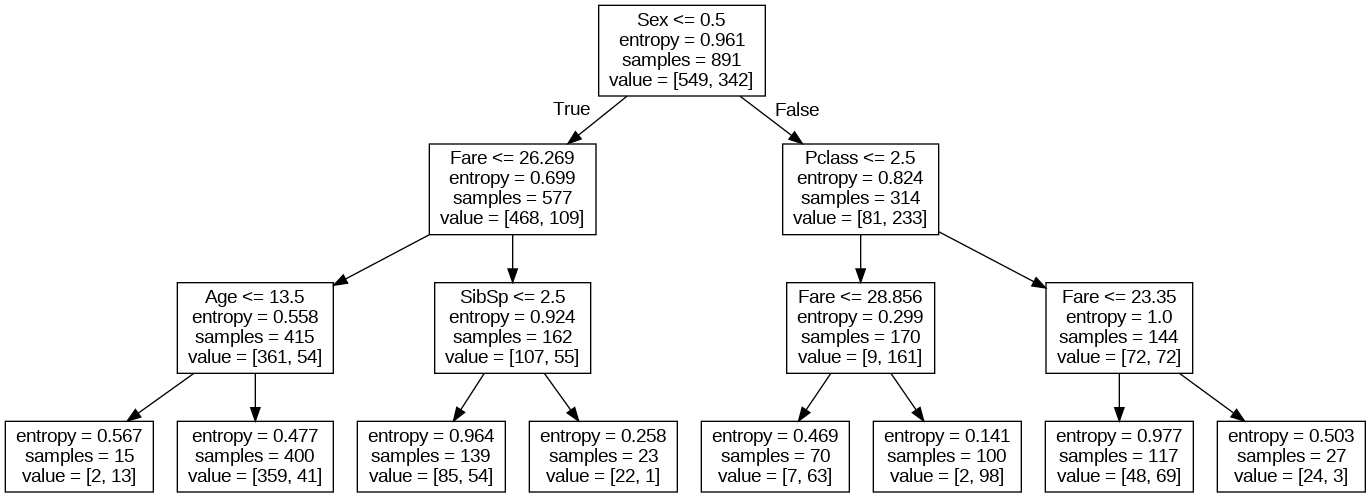

In [17]:
#code cell 14
from IPython.display import Image

Image("titanic.png")

***e) Interpret the tree***<br><br>
From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it is
the single most important factor in making the classification. The branches to the left are for Gender = 0 or male.
Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fit
the critierion at that point in the tree. For example, the root node indicates that there are 891 observations that
make up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. In
the third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.
Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of
13.5, and the other 400 were older than that age.<br><br>
Finally, the elements in the value array indicate survival. The first value is the number of people who died, and
the second is the number of survivors for each criterion. The root node tells us that out of our sample, 549
people died and 342 survived.<br><br>
Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes in
which the decision results in equal values in the survival value array, the entropy is at its highest possible value,
which is 1.0. This means that the model was unable to definitively make the classification decision based on the
input variables. For values of very low entropy, the decision was much more clear cut, and the difference in the
number of survivors and victims is much higher.<br><br>
What describes the group that had the most deaths by number? Which group had the most survivors?
-

<h3> <b>Part 2: Apply the Decision Tree Model </h3></b><br>



In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset of
Titanic passengers. The decision tree will evaluate the features of each observation and label the observation as
survived (label = 1) or died (label = 0)
<br><br>
**Step 1: Import and Prepare the Data** <br><br>
In this step, you will import and prepare the data for analysis.<br><br>
***a) Import the data.***<br><br>
Name the dataframe "testing" and import the file titanic-test.csv.

In [18]:
#code cell 15
testing = pd.read_csv("titanic_test.csv")

In [19]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


How many records are in the data set?
- There are a total of 418 entries in the data set.

Which important variables(s) are missing values and how many are missing?
- There are 86 values missing in Age, 1 in Fare, and 327 values missing in Cabin.

***b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for
female.***

In [20]:
# code cell 16
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel ==
'male' else 1)

***c) Replace the missing age values with the mean of the ages.***

In [21]:
# code cell 17
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

***d) Verify that the values have been replaced.
Check that the missing values have been filled and that the Gender labels are 0 and 1.***

In [22]:
# code cell 18.1
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [23]:
# code cell 18.2
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


**Step 2: Label the testing dataset**<br><br>
In this step, you will apply the learned model to the testing dataset.<br><br>
***a) Create the array of input variables from the testing data set.***


In [24]:
#code cell 19
X_input = testing[list(columns)].values

In [25]:
print(X_input)

[[ 7.8292      3.          0.         34.5         0.        ]
 [ 7.          3.          1.         47.          1.        ]
 [ 9.6875      2.          0.         62.          0.        ]
 ...
 [ 7.25        3.          0.         38.5         0.        ]
 [ 8.05        3.          0.         30.27259036  0.        ]
 [22.3583      3.          0.         30.27259036  1.        ]]


***b) Apply the model to the testing data set.***<br><br>
Use the predict() method of the clf_train object that was trained to label the observations in the testing data
set with the most likely survival classification. Provide the array of input variables from the testing data set as the
parameter for this method.

In [26]:
# code cell 20
target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

***c) Evaluate the accuracy of the estimated labels***<br><br>
The ground truth for the survival of each passenger can be found in another file called all_data.csv. To select
only the passengers contained in the testing dataset, we merge the target_labels dataframe and the
all_data dataframe on the field Name. We then compare the estimated label with the ground truth dataframe
and compute the accuracy of the learned model.

In [27]:
# code cell 21
import numpy as np
all_data = pd.read_csv("titanic_all.csv")
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived'])
float(len(testing_results))

397.0

**<h3> Part 3: Evaluate the Decision Tree Model </h3>**

The sklearn library includes a module that can be used to evaluate the accurracy of the decision tree model.
The train_test_split() method will divide the observations in whole data set into two randomly selected
arrays of observations that makeup the testing and training datasets. After fitting the model to the training data,
the trained model can be scored and the prediction accurracy compared for both the training and test datasets. It
is desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for the
training data set.<br><br>
***Step 1: Import the data***<br><br>
This time we will import the data from a csv file, but we will specify the columns that we want to have appear in
the dataframe. We will do this by passing an array-like list of column names to the read_csv() method usecols
parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be in
quotes and the list should be square brackets. Name this dataframe all_data.

In [28]:
# code cell 22
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass',
'Gender','Age','SibSp','Fare'])

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


How many records are in the data set?
- There are 1308 entries in the data set.

Which important variables(s) are missing values and how many are missing?
- There are 263 entries missing for age.

**Step 2: Prepare the data.<br><br>
*a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.***

In [30]:
# code cell 23
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel ==
'male' else 1)

***c) Replace the missing age values with the mean of the age of all members of the data set.***

In [31]:
# code cell 24
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [32]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


**Step 2: Create the input and output variables for the training and testing data.**<br><br>
The sklearn library includes modules that help with model selection. We will import from
sklearn.model_selection the train_test_split() method. This method will automatically split the entire
dataset, returning in total four numpy arrays, two for the features (test and validation) and two for the labels (test
and validation). One parameter of the method specifies the proportion of observations to use for testing and
training. Another parameter specifies a seed value that will be used to randomize assignment of the observation
to testing or training. This is used so that another user can replicate your work by receiving the same
assignments of observations to datasets. The syntax of the method is:<br><br>
```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```<br><br>
40% of the data will be used for testing. The random seed is set to 0.<br><br>
The method returns four values. These values are the input varibles for training and testing data and the target
variables for the training and testing data in that order.

***a) Designate the input variables and output variables and generate the arrays.***

In [33]:
# fix to run code cell 25
alldatafix = pd.DataFrame(all_data)
alldatafix.rename(columns = {'Gender' : 'Sex'}, inplace = True)

In [34]:
# code cell 25

from sklearn.model_selection import train_test_split

X = all_data[list(columns)].values
y = all_data["Survived"].values

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

***b) Train the model and fit it to the testing data.***<br><br>
Now the model can be fit again. The model will be trained using only the training datat, as selected by the
train_test_split function.


In [35]:
# code cell 26
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(X_train, y_train)

***c) Compare models by scoring each.***<br><br>
Use the score() method of each decision tree object to generate scores.

In [36]:
# code cell 27

train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


We have now compared the scores for the trained model on both test and validation data. As expected, the test
accuracy score is close, but lower than the score for the training data. This is because normally, the model tends
to overfit the training data, therefore the test score is a better evaluation of how the model is able to generalize
outside of the training data.

<h3><b> Part 4 For Further Study (optional) </h3>

If you have the time and are interested, you could try the following and see how the decision tree is affected.<br><br>
**1. Remove observations with missing Age values.**<br>
Using a mean to replace missing age values may affect the accuracy of the model. One approach to this might
be to remove all observations with missing age values. Although this will decrease the size of the training
dataset, it could improve accuracy.

In [37]:
all_data1 = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass', 'Gender','Age','SibSp','Fare'])
all_data1.dropna(subset=['Age'])

# successful removal, indicative of 1308 rows reduced to 1045

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500
...,...,...,...,...,...,...
1300,0,3,male,45.5000,0,7.2250
1303,0,3,female,14.5000,1,14.4542
1305,0,3,male,26.5000,0,7.2250
1306,0,3,male,27.0000,0,7.2250


**2. Remove the input variables.** <br><br>
Another issue with this type of analysis is the identification of which input variables, or features, are essential to
the accuracy of the classifier. One way to do this is to try running the classifier with different sets of input
variables by editing the list of variables that is used to fit the model.

In [44]:
y_target_new = training["Survived"].values
cols = ["Sex", "Age", "SibSp"]
x_input_new = training[list(cols)].values
clf_train_new = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
clf_train_new = clf_train.fit(x_input_new, y_target_new)
clf_train_new.score(x_input_new, y_target_new)

0.8204264870931538